# KE LAB Record

## Name:B.Pavan Kalyan           Rollno:411610

Importing required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
import skfuzzy as fuzz
from sklearn import datasets

##  IRIS DataSet

In [2]:
train = pd.read_csv("C:\\Users\\priya\\Downloads\\iris.csv")
train

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
missing_values=train.isnull().sum()
missing_values

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

As there are no missing values so, no data cleaning

Now,Finding Class Distribution

In [4]:
print(train['Species'].value_counts())

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64


The class distribution looks like pretty high to '0' but its ok we may try to preprocess if we want to increase the accuracy

Now, splitting the dataset into Features(i.e X) and Label(i.e y)

In [5]:
X=train.iloc[:,:-1 ].values
y=train.iloc[:,-1].values
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y , test_size = 0.25,random_state=0)

C:\Users\priya\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Scaling the features

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)

# I.Classification

## 1.Decision Tree Classifier
Now, we draw a decision tree based on entropy and measure the accuracy


In [7]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy')
classifier.fit(X_train,y_train)
y_pred =classifier.predict(X_test)
print(classifier.score(X_test,y_test)*100)

100.0


## 2.Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm
print(classifier.score(X_test,y_test)*100)

94.73684210526315


## 3.Support Vector Machine

In [9]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train, y_train) 
y_pred = svclassifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred)) 
print(classifier.score(X_test,y_test)*100) 

[[13  0  0]
 [ 0 16  0]
 [ 0  0  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      1.00      1.00        16
 Iris-virginica       1.00      1.00      1.00         9

    avg / total       1.00      1.00      1.00        38

94.73684210526315


# II.Regression

## 4.Polynomial Regression

Coefficients: 
 [ -59.73663337 -215.62170919  599.92621335  291.96724002 -829.65206295
  544.63994617  164.85191153  224.2392528   768.94426062   70.84982207]
Variance score: 0.4160439011127659


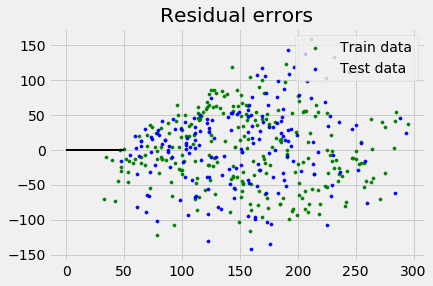

In [10]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
from sklearn import datasets, linear_model, metrics 
  
# load the forestfires dataset 
#balance_data = pd.read_csv( '/home/anuhya/datasets/forestfires.csv') 
      
#new_data = {"month":{"jan":1,"feb":2,"mar":3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12},
 #                "day":{"sun":1,"mon":2,"tue":3,"wed":4,"thu":5,"fri":6,"sat":7}
  #               }
#balance_data.replace(new_data,inplace=True)
 
#balance_data=np.array(balance_data)

diabetes = datasets.load_diabetes(return_X_y=False) 
  
# defining feature matrix(X) and response vector(y) 
X = diabetes.data
y = diabetes.target 

# splitting X and y into training and testing sets 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, 
                                                    random_state=1) 
  
# create linear regression object 
reg = linear_model.LinearRegression() 
  
# train the model using the training sets 
reg.fit(X_train, y_train) 
  
# regression coefficients 
print('Coefficients: \n', reg.coef_) 
  
# variance score: 1 means perfect prediction 
print('Variance score: {}'.format(reg.score(X_test, y_test))) 
  
# plot for residual error 
  
## setting plot style 
plt.style.use('fivethirtyeight') 
  
## plotting residual errors in training data 
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train, 
            color = "green", s = 10, label = 'Train data') 
  
## plotting residual errors in test data 
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test, 
            color = "blue", s = 10, label = 'Test data') 
  
## plotting line for zero residual error 
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2) 
  
## plotting legend 
plt.legend(loc = 'upper right') 
  
## plot title 
plt.title("Residual errors") 
  
## function to show plot 
plt.show() 


# 5.Random Forest Regression

In [11]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train);
y_pred = rf.predict(X_test)
rf.score(X_test, y_test)
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 


Mean Absolute Error: 50.67715254237288
Mean Squared Error: 4069.482850621469
Root Mean Squared Error: 63.79249838830165


# 6.Neural Networks

In [12]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))
mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print("Confusion Matrix: ", 
        confusion_matrix(y_test, y_pred)) 
      
print ("Accuracy : ", 
    accuracy_score(y_test,y_pred)*100) 
      
print("Report : ", 
    classification_report(y_test, y_pred)) 

Confusion Matrix:  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy :  0.5649717514124294
Report :               precision    recall  f1-score   support

       39.0       0.00      0.00      0.00         2
       42.0       0.00      0.00      0.00         1
       48.0       0.00      0.00      0.00         1
       49.0       0.00      0.00      0.00         1
       51.0       0.00      0.00      0.00         2
       52.0       0.00      0.00      0.00         3
       55.0       0.00      0.00      0.00         2
       57.0       0.00      0.00      0.00         1
       58.0       0.00      0.00      0.00         1
       59.0       0.00      0.00      0.00         2
       60.0       0.00      0.00      0.00         1
       63.0       0.00      0.00      0.00         3
       64.0       0.00      0.00      0.00         1
       65.0       0.00      0.00      0.00         1
       66.0       0.00  

C:\Users\priya\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\priya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\priya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


# Clustering

# 7.K-Means

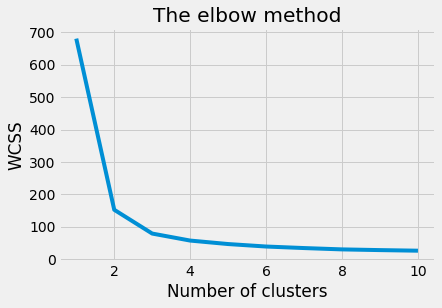

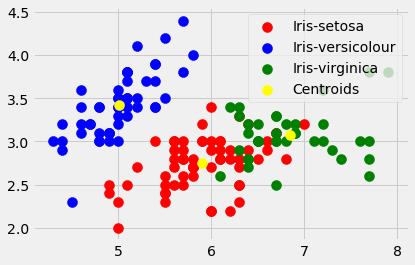

In [13]:
#importing the Iris dataset with pandas
dataset = pd.read_csv('C:\\Users\\priya\\Downloads\\Iris.csv')
x = dataset.iloc[:, [1, 2, 3, 4]].values
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

# 8.K-Mediods

In [19]:
import numpy as np
import random

def kMedoids(D, k, tmax=100):
    # determine dimensions of distance matrix D
    m, n = D.shape

    if k > n:
        raise Exception('too many medoids')

    # find a set of valid initial cluster medoid indices since we
    # can't seed different clusters with two points at the same location
    valid_medoid_inds = set(range(n))
    invalid_medoid_inds = set([])
    rs,cs = np.where(D==0)
    # the rows, cols must be shuffled because we will keep the first duplicate below
    index_shuf = list(range(len(rs)))
    np.random.shuffle(index_shuf)
    rs = rs[index_shuf]
    cs = cs[index_shuf]
    for r,c in zip(rs,cs):
        # if there are two points with a distance of 0...
        # keep the first one for cluster init
        if r < c and r not in invalid_medoid_inds:
            invalid_medoid_inds.add(c)
    valid_medoid_inds = list(valid_medoid_inds - invalid_medoid_inds)

    if k > len(valid_medoid_inds):
        raise Exception('too many medoids (after removing {} duplicate points)'.format(
            len(invalid_medoid_inds)))

    # randomly initialize an array of k medoid indices
    M = np.array(valid_medoid_inds)
    np.random.shuffle(M)
    M = np.sort(M[:k])

    # create a copy of the array of medoid indices
    Mnew = np.copy(M)

    # initialize a dictionary to represent clusters
    C = {}
    for t in range(tmax):
        # determine clusters, i. e. arrays of data indices
        J = np.argmin(D[:,M], axis=1)
        for kappa in range(k):
            C[kappa] = np.where(J==kappa)[0]
        # update cluster medoids
        for kappa in range(k):
            J = np.mean(D[np.ix_(C[kappa],C[kappa])],axis=1)
            j = np.argmin(J)
            Mnew[kappa] = C[kappa][j]
        np.sort(Mnew)
        # check for convergence
        if np.array_equal(M, Mnew):
            break
        M = np.copy(Mnew)
    else:
        # final update of cluster memberships
        J = np.argmin(D[:,M], axis=1)
        for kappa in range(k):
            C[kappa] = np.where(J==kappa)[0]

# return results
    return M, C

from sklearn.metrics.pairwise import pairwise_distances
import numpy as np
import pandas as pd

# 3 points in dataset
iris_data = pd.read_csv('C:/Users/priya/Downloads/Iris.csv')
data = iris_data.values[:, 1:4]

# distance matrix
D = pairwise_distances(data, metric='euclidean')

# split into 2 clusters
M, C = kMedoids(D, 3)

print('medoids:')
for point_idx in M:
    print( data[point_idx] )

print('')
print('clustering result:')
for label in C:
    for point_idx in C[label]:
        print('label {0}:　{1}'.format(label, data[point_idx]))



medoids:
[5.0 3.4 1.5]
[6.0 2.9 4.5]
[6.7 3.1 5.6]

clustering result:
label 0:　[5.1 3.5 1.4]
label 0:　[4.9 3.0 1.4]
label 0:　[4.7 3.2 1.3]
label 0:　[4.6 3.1 1.5]
label 0:　[5.0 3.6 1.4]
label 0:　[5.4 3.9 1.7]
label 0:　[4.6 3.4 1.4]
label 0:　[5.0 3.4 1.5]
label 0:　[4.4 2.9 1.4]
label 0:　[4.9 3.1 1.5]
label 0:　[5.4 3.7 1.5]
label 0:　[4.8 3.4 1.6]
label 0:　[4.8 3.0 1.4]
label 0:　[4.3 3.0 1.1]
label 0:　[5.8 4.0 1.2]
label 0:　[5.7 4.4 1.5]
label 0:　[5.4 3.9 1.3]
label 0:　[5.1 3.5 1.4]
label 0:　[5.7 3.8 1.7]
label 0:　[5.1 3.8 1.5]
label 0:　[5.4 3.4 1.7]
label 0:　[5.1 3.7 1.5]
label 0:　[4.6 3.6 1.0]
label 0:　[5.1 3.3 1.7]
label 0:　[4.8 3.4 1.9]
label 0:　[5.0 3.0 1.6]
label 0:　[5.0 3.4 1.6]
label 0:　[5.2 3.5 1.5]
label 0:　[5.2 3.4 1.4]
label 0:　[4.7 3.2 1.6]
label 0:　[4.8 3.1 1.6]
label 0:　[5.4 3.4 1.5]
label 0:　[5.2 4.1 1.5]
label 0:　[5.5 4.2 1.4]
label 0:　[4.9 3.1 1.5]
label 0:　[5.0 3.2 1.2]
label 0:　[5.5 3.5 1.3]
label 0:　[4.9 3.1 1.5]
label 0:　[4.4 3.0 1.3]
label 0:　[5.1 3.4 1.5]
label 0:　

# 9.Fuzzy C-means

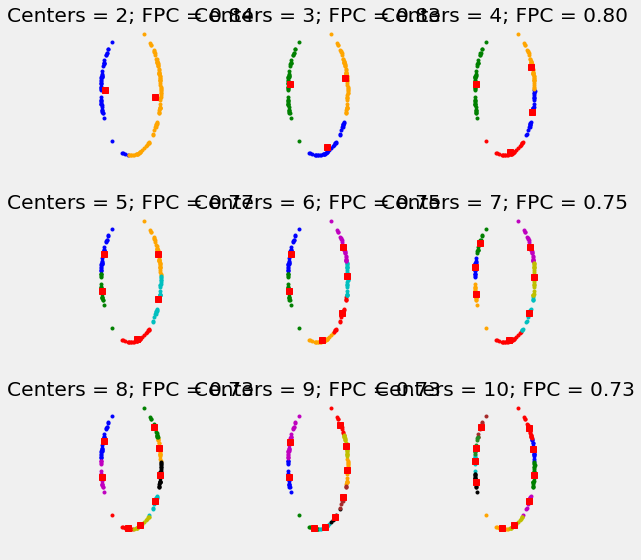

In [15]:

iris = datasets.load_iris()

x = pd.DataFrame(iris.data, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
y = pd.DataFrame(iris.target, columns=['Target'])
scaler = StandardScaler()
X_std = scaler.fit_transform(x)
lsa = TruncatedSVD(2, algorithm = 'arpack')
dtm_lsa = lsa.fit_transform(X_std)
dtm_lsa = Normalizer(copy=False).fit_transform(dtm_lsa)
a= pd.DataFrame(dtm_lsa, columns = ["component_1","component_2"])
a['targets']=y
fig1, axes1 = plt.subplots(3, 3, figsize=(8, 8))
alldata = np.vstack((a['component_1'], a['component_2']))
fpcs = []

colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen'] 

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)

    # Store fpc values for later plots
    fpcs.append(fpc)

    # Plot assigned clusters, for each data point in training set
    cluster_membership = np.argmax(u, axis=0)
    for j in range(ncenters):
        ax.plot(a['component_1'][cluster_membership == j],
                a['component_2'][cluster_membership == j], '.', color=colors[j])

    # Mark the center of each fuzzy cluster
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')

    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
    ax.axis('off')

fig1.tight_layout()
fig1.savefig('iris_dataset.png')


# III.Dimensionality Reduction

# 10.Single Value Decomposition

In [16]:
# set numpy printing options
np.set_printoptions(suppress=True)
np.set_printoptions(precision=3)

# Full SVD is taught more often. Here is a good explination of the different
# http://www.cs.cornell.edu/Courses/cs322/2008sp/stuff/TrefethenBau_Lec4_SVD.pdf
print ("--- FULL ---")
U, s, VT = np.linalg.svd(X, full_matrices=True)

print ("U:\n {}".format(U))
print ("s:\n {}".format(s))
print ("VT:\n {}".format(VT))

# the reduced or trucated SVD operation can save time by ignoring all the
# extremly small or exactly zero values. A good blog post explaing the benefits
# can be found here:
# http://blog.explainmydata.com/2016/01/how-much-faster-is-truncated-svd.html
print ("--- REDUCED ---")

U, s, VT = np.linalg.svd(X, full_matrices=False)

print ("U:\n {}".format(U))
print ("s:\n {}".format(s))
print ("VT:\n {}".format(VT))

--- FULL ---
U:
 [[-0.014 -0.076  0.026 ... -0.038  0.046  0.029]
 [ 0.067  0.053  0.001 ...  0.035 -0.028 -0.034]
 [-0.006 -0.064  0.032 ...  0.028 -0.049  0.054]
 ...
 [ 0.005 -0.047  0.021 ...  0.99   0.008  0.014]
 [-0.016  0.008 -0.038 ...  0.008  0.989  0.005]
 [ 0.045  0.155 -0.002 ...  0.014  0.004  0.935]]
s:
 [2.006 1.222 1.098 0.977 0.814 0.776 0.733 0.659 0.28  0.093]
VT:
 [[-0.216 -0.187 -0.303 -0.272 -0.343 -0.352  0.282 -0.429 -0.379 -0.322]
 [ 0.044 -0.387 -0.156 -0.138  0.573  0.456  0.506 -0.068 -0.026 -0.085]
 [ 0.495 -0.107  0.168  0.514 -0.069 -0.27   0.386 -0.381  0.064  0.277]
 [-0.414 -0.68   0.5   -0.02  -0.068 -0.168 -0.076  0.008  0.264  0.087]
 [-0.687  0.373  0.129  0.487  0.129  0.117  0.245 -0.144 -0.152  0.031]
 [ 0.226 -0.042  0.403  0.273 -0.005  0.133 -0.106  0.034 -0.179 -0.805]
 [-0.11  -0.068 -0.52   0.321  0.074 -0.231 -0.008  0.071  0.647 -0.357]
 [ 0.015  0.443  0.393 -0.477  0.129 -0.191  0.325 -0.181  0.45  -0.167]
 [-0.008  0.002 -0.042 -0.02

# 11. Principal Component Analysis

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents)
principalDf

,0,1
0,0.027931,-0.092601
1,-0.134686,0.065263
2,0.012945,-0.077764
3,0.002345,0.018182
4,-0.035981,0.038621
5,-0.188660,-0.018125
6,-0.094835,-0.038316
7,0.098739,0.086945
8,0.028683,-0.041917
9,-0.010091,-0.023445


## 12.Fischers linear discrement analysis

In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)
print("The clustered output is:\n",clf.predict(X_test))

The clustered output is:
 [134.  61.  95.  72.  71. 252. 275.  71. 124.  72. 258.  91.  71.  54.
 280. 288. 252.  96.  81. 150. 164.  72.  68.  99.  90. 265. 114. 128.
 138. 110.  42. 219. 229.  87. 265. 225. 185. 258. 174. 292. 129. 265.
  71.  71.  87. 190. 128. 200. 142. 197.  47. 140. 108. 153. 110.  53.
  73.  78.  72.  72. 102. 186.  91. 128. 242.  72.  53. 186. 229.  48.
 152.  43.  72.  77. 142.  87. 160.  61. 173. 293.  77.  53. 150. 120.
 185.  53.  72.  87. 233. 116. 142.  73.  61.  53.  42.  95. 200.  53.
 103. 173. 141.  87. 128. 209. 275. 201. 190. 281. 183.  72.  50. 272.
 230.  42. 252. 128.  68. 200. 191. 124.  75. 277. 259. 202. 168. 126.
  72. 131. 270. 202.  53. 128. 202. 281. 120. 128.  74. 139.  54.  75.
 310. 185. 246.  48. 128.  53. 155. 150. 173. 185. 186. 257. 202.  53.
 113.  72. 124. 168.  87. 114.  53. 202.  61. 124. 268. 220. 222. 272.
 135. 200. 182. 154.  75. 186.  85. 174. 321.]
